In [1]:
import os
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pyspark.pandas as ps
import numpy as np

%matplotlib inline

In [2]:
def load_table(filename):
    tpch_df = spark.read.format('csv') \
    .option('header', 'false') \
    .option('delimiter', '|') \
    .load(filename, inferSchema='true')    
    return tpch_df

def getFieldList(tablename):
    dss_ddl_file = tpch_home + "/dss.ddl"
    table=tablename
    with open(dss_ddl_file, 'r') as file:
        data = file.read()
    str_pos= data.index(table)
    end_pos= data.index(";",str_pos)
    data=data[str_pos+len(table)+3: end_pos]    
    data =[i.strip()for i in data.split("\n")]
    fields=[]
    for line in data:
        fields.append(line.split()[0])
    return fields   

In [3]:
#tpch_home = "/usr/share/ApacheSpark/data/tpch/TPC-H-V3.0.1/dbgen"
tpch_home = "/usr/share/ApacheSpark/data/tpch/TPC-H-Skew"
z_path="/z_1_3"

path= tpch_home + z_path

# Get a list of all .tbl files in the directory
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith('.tbl')]

# Print the list of files
print(files)

['supplier.tbl', 'order.tbl', 'partsupp.tbl', 'nation.tbl', 'lineitem.tbl', 'region.tbl', 'part.tbl', 'customer.tbl']


In [4]:
tablename= "lineitem.tbl";
filename= path + "/"+tablename
tpch_df = load_table(filename)
print(f"Total Rows in {tablename}:", tpch_df.count())

Total Rows in lineitem.tbl: 600000


In [5]:
tpch_df.show(5)
tpch_df.printSchema()

+---+-----+---+---+---+--------+----+----+---+---+-------------------+-------------------+-------------------+-----------------+-------+--------------------+----+
|_c0|  _c1|_c2|_c3|_c4|     _c5| _c6| _c7|_c8|_c9|               _c10|               _c11|               _c12|             _c13|   _c14|                _c15|_c16|
+---+-----+---+---+---+--------+----+----+---+---+-------------------+-------------------+-------------------+-----------------+-------+--------------------+----+
|  1|15519|785|  1| 17|24386.67|0.04|0.02|  N|  O|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|DELIVER IN PERSON|  TRUCK|B3hnOy6xLnMz2jk63...|null|
|  1|15519|785|  2| 17|24386.67|0.04|0.02|  N|  O|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|DELIVER IN PERSON|  TRUCK|26wRNOn6SO15lySjw...|null|
|  1|15519|520|  3| 17|24386.67|0.04|0.02|  N|  O|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00| TAKE BACK RETURN|  TRUCK|BP5xi12gQgkN35gmO...|null|
|  1|15519|520|  4| 17

In [6]:
tpch_df.select("_c4","_c5","_c6", "_c10", "_c11", "_c12").show(5)

+---+--------+----+-------------------+-------------------+-------------------+
|_c4|     _c5| _c6|               _c10|               _c11|               _c12|
+---+--------+----+-------------------+-------------------+-------------------+
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
+---+--------+----+-------------------+-------------------+-------------------+
only showing top 5 rows



In [7]:
psdf = tpch_df.select("_c4","_c5","_c6", "_c10", "_c11", "_c12").pandas_api()

In [8]:
psdf.describe()

23/04/04 15:33:34 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


/usr/local/spark/python/pyspark/pandas/internal.py:1573: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  fields = [
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


,_c4,_c5,_c6,_c10,_c11,_c12
count,600000.000000,600000.000000,600000.000000,600000,600000,600000
mean,23.000000,34352.428261,0.058042,1995-09-11 03:25:30.420000,1995-08-28 05:31:13.422000,1995-09-22 03:31:50.550000
min,1.000000,976.060000,0.000000,1992-01-11 00:00:00,1992-02-09 00:00:00,1992-02-03 00:00:00
25%,17.000000,24386.670000,0.040000,1994-08-11 00:00:00,1994-08-09 00:00:00,1994-08-26 00:00:00
50%,23.000000,29151.460000,0.050000,1996-03-13 00:00:00,1996-02-12 00:00:00,1996-03-22 00:00:00
75%,36.000000,49818.120000,0.090000,1996-04-13 00:00:00,1996-03-20 00:00:00,1996-04-19 00:00:00
max,50.000000,93397.500000,0.100000,1998-11-28 00:00:00,1998-10-19 00:00:00,1998-12-16 00:00:00
std,11.623944,18460.274641,0.030768,None,None,None


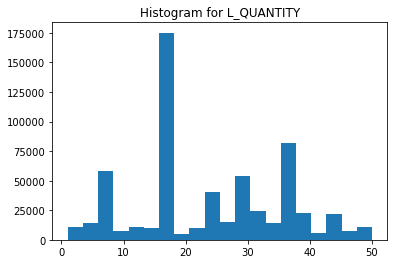

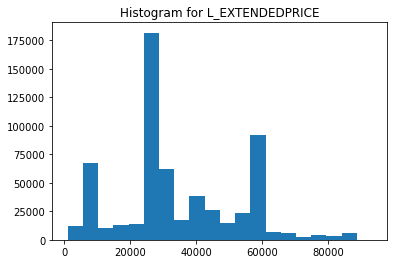

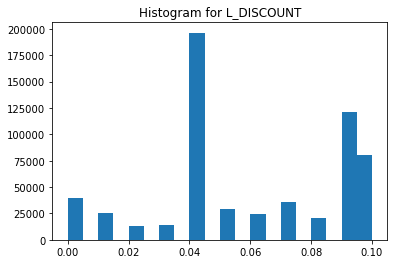

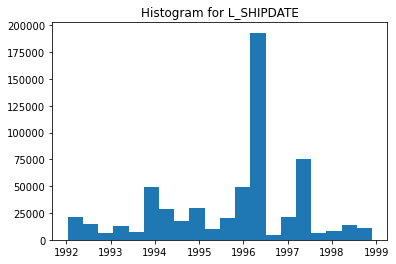

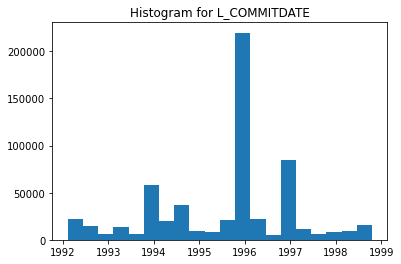

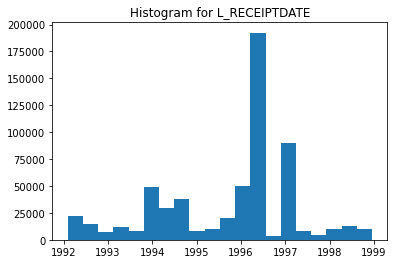

In [9]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

# Create a random number generator with a fixed seed for reproducibility
field_List= getFieldList(tablename="LINEITEM")
col_list= tpch_df.columns
n_bins = 20

for col in psdf.columns: 
    dist1 = psdf[col]    
    field_label = field_List[col_list.index(col)]
    fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=False)
    axs.hist(dist1, bins=n_bins)
    axs.set_title(f"Histogram for {field_label}")